# Data Collection

In [198]:
import pandas as pd
import numpy as np

In [231]:
!pip install python-docx

In [273]:
from docx import Document

# 2009

In [337]:
file_paths_2009 = [
    "/Users/diananigmatullina/Desktop/dst_2009_01.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_02.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_03.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_04.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_05.docx",
    "/Users/diananigmatullina/Desktosmap/dst_2009_06.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_07.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_08.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_09.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_10.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_11.docx",
    "/Users/diananigmatullina/Desktop/dst_2009_12.docx"
]

In [338]:
all_data = []  # List to store the extracted data from each file

# Iterate over the file paths
for file_path in file_paths_2009:
    # Read the data from the DOCX file
    doc = Document(file_path)

    # Initialize lists to store the extracted data
    dates = []
    values = []

    # Iterate over the paragraphs in the document
    for paragraph in doc.paragraphs:
        # Split the paragraph text based on whitespace
        parts = paragraph.text.split()

        # Extract the date and values from the split parts
        date = parts[0]
        dst_values = parts[3:]

        # Process the values and handle any errors
        try:
            dst_values = [int(value) for value in dst_values]
        except ValueError:
            dst_values = [np.nan] * len(dst_values)

        # Append the date and values to the respective lists
        dates.append(date)
        values.append(dst_values)

    # Create a pandas DataFrame from the extracted data
    dst_data = pd.DataFrame(values, index=dates)

    # Transpose the DataFrame to have dates as columns and hours as rows
    dst_data = dst_data.transpose()

    # Append the DataFrame to the list
    all_data.append(dst_data)

# Concatenate the DataFrames from all files
combined_data = pd.concat(all_data, axis=1)

In [339]:
combined_data

,DST0901*01,DST0901*02,DST0901*03,DST0901*04,DST0901*05,DST0901*06,DST0901*07,DST0901*08,DST0901*09,DST0901*10,...,DST0912*22,DST0912*23,DST0912*24,DST0912*25,DST0912*26,DST0912*27,DST0912*28,DST0912*29,DST0912*30,DST0912*31
0,-7,-3,-10,-9,-5,-5,-8,0,4,0,...,1,-3,-4,-1,0,-4,4,0,5,11
1,-5,-5,-7,-8,-5,-4,-9,-1,4,-1,...,-1,-4,-5,-4,-2,-4,3,-2,4,11
2,-4,-6,-7,-8,-4,-7,-11,-2,1,-5,...,-2,-3,-7,-4,-4,-4,2,-2,3,11
3,-5,-5,-11,-10,-5,-11,-9,-2,-4,-8,...,-1,-1,-5,-2,-4,-2,2,-1,1,11
4,-7,-7,-14,-10,-6,-11,-9,-2,-9,-8,...,1,2,-2,0,-3,2,2,-1,2,9
5,-7,-8,-15,-9,-8,-11,-8,-2,-9,-10,...,3,6,-2,3,0,3,3,-2,4,9
6,-9,-9,-11,-6,-6,-12,-6,0,-7,-7,...,0,9,-2,4,-1,4,3,-3,5,11
7,-12,-8,-8,-8,-8,-14,-6,0,-6,-4,...,0,12,-3,4,1,-1,3,-2,6,11
8,-11,-7,-7,-7,-11,-14,-5,-1,-5,-5,...,4,14,0,5,-2,-4,4,1,6,12
9,-8,-5,-9,-7,-10,-13,-5,1,-4,-5,...,5,11,0,6,-6,-5,1,3,7,12


# Data Exploration and Visualization

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
# Get information about the DataFrame
print(combined_data.info())

# Summary statistics of the DataFrame
print(combined_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 365 entries, DST0901*01 to DST0912*31
dtypes: int64(365)
memory usage: 71.4 KB
None
       DST0901*01  DST0901*02  DST0901*03  DST0901*04  DST0901*05  DST0901*06  \
count   25.000000   25.000000   25.000000   25.000000   25.000000   25.000000   
mean   -10.640000   -7.120000  -10.600000   -9.520000   -8.000000  -11.520000   
std      4.270831    2.635021    2.972092    3.809199    2.217356    3.280244   
min    -17.000000  -12.000000  -18.000000  -19.000000  -12.000000  -17.000000   
25%    -14.000000   -9.000000  -12.000000  -10.000000   -9.000000  -14.000000   
50%    -11.000000   -7.000000  -10.000000   -9.000000   -8.000000  -12.000000   
75%     -7.000000   -5.000000   -8.000000   -8.000000   -6.000000  -11.000000   
max     -4.000000   -2.000000   -7.000000   -3.000000   -4.000000   -4.000000   

       DST0901*07  DST0901*08  DST0901*09  DST0901*10  ...  DST0912*22  \
count   25.000000   25.000000   2

<Figure size 3600x3600 with 0 Axes>

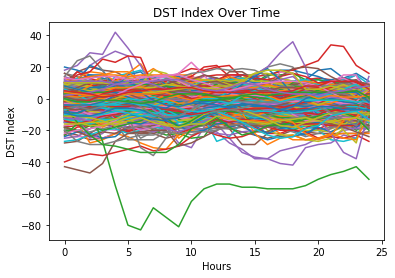

In [342]:
# Plot the DST index over time
plt.figure(figsize=(50, 50))
combined_data.plot(legend=False)
plt.title('DST Index Over Time')
plt.xlabel('Hours')
plt.ylabel('DST Index')
plt.show()

In [343]:
# Convert the index to datetime format
dates = []
for date_str in combined_data.columns:
    year = int(date_str[3:5]) + 2000 # Extract the year and add 2000 to convert it to a four-digit year
    month = int(date_str[5:7])       # Extract the month
    day = int(date_str[8:])         # Extract the hour
    dates.append(pd.Timestamp(year=year, month=month, day=day))


# Assign the converted dates as the new index
combined_data.columns = dates
combined_data.sort_index(axis=1, inplace=True)


<Figure size 720x432 with 0 Axes>

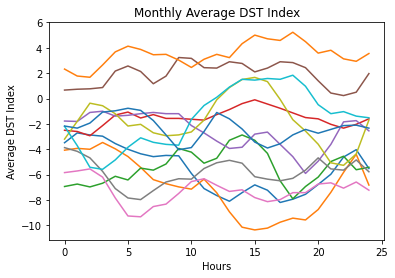

In [344]:
# Plot monthly average DST index
monthly_avg = combined_data.resample('M', axis=1).mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(legend=False)
plt.title('Monthly Average DST Index')
plt.xlabel('Hours')
plt.ylabel('Average DST Index')
plt.show()

# Feature Engineering

In [345]:
data = combined_data
data_transposed = data.transpose()

# Convert the index to datetime format
data_transposed.index = pd.to_datetime(data_transposed.index, format='%Y-%m-%d')

# Calculate lag features
for i in range(1, 25):
    data_transposed[f'DST_lag{i}'] = data_transposed.iloc[:, i].shift(1)  # Lag i

# Calculate rolling mean features
for i in range(1, 25):
    data_transposed[f'DST_rolling_mean_{i}'] = data_transposed.iloc[:, i].rolling(window=3).mean()

# Calculate rolling standard deviation features
for i in range(1, 25):
    data_transposed[f'DST_rolling_std_{i}'] = data_transposed.iloc[:, i].rolling(window=3).std()

# Calculate difference between current and lagged values
for i in range(1, 25):
    data_transposed[f'DST_diff_{i}'] = data_transposed.iloc[:, i] - data_transposed.iloc[:, i + 24]  # Difference between current and same hour of previous day

# Calculate month and hour features
data_transposed['Month'] = data_transposed.index.month
data_transposed['Hour'] = data_transposed.index.hour

# Print the updated DataFrame with engineered features
data_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,DST_diff_17,DST_diff_18,DST_diff_19,DST_diff_20,DST_diff_21,DST_diff_22,DST_diff_23,DST_diff_24,Month,Hour
2009-01-01,-7,-5,-4,-5,-7,-7,-9,-12,-11,-8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2009-01-02,-3,-5,-6,-5,-7,-8,-9,-8,-7,-5,...,9.0,7.0,5.0,5.0,4.0,4.0,-4.0,4.0,1,0
2009-01-03,-10,-7,-7,-11,-14,-15,-11,-8,-7,-9,...,-10.0,-4.0,1.0,0.0,-1.0,-5.0,0.0,-4.0,1,0
2009-01-04,-9,-8,-8,-10,-10,-9,-6,-8,-7,-7,...,-1.0,-4.0,-5.0,-2.0,3.0,5.0,4.0,1.0,1,0
2009-01-05,-5,-5,-4,-5,-6,-8,-6,-8,-11,-10,...,8.0,6.0,3.0,1.0,-2.0,-6.0,-4.0,2.0,1,0


The new columns "DST_diff_1" to "DST_diff_24" represent the difference between the current value of the DST (Daylight Saving Time) for a specific hour and the DST value for the same hour on the previous day.
For example, "DST_diff_1" represents the difference between the current DST value at hour 1 and the DST value at hour 1 on the previous day. Similarly, "DST_diff_2" represents the difference between the current DST value at hour 2 and the DST value at hour 2 on the previous day, and so on.
These difference values can be useful in capturing the changes or variations in DST values between consecutive days for each specific hour. They can provide insights into the daily fluctuations or patterns in DST values, highlighting any shifts or deviations from the previous day's DST values.

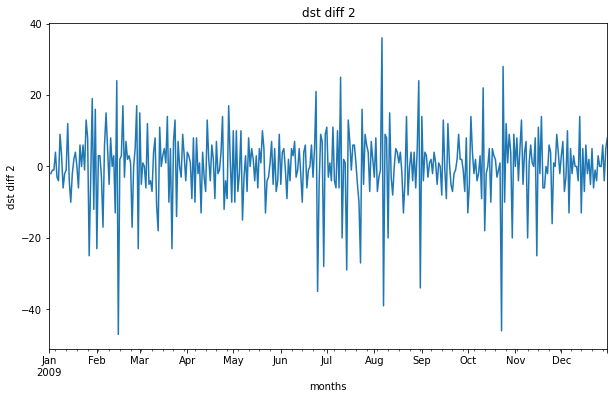

In [366]:
diff_2 = data_transposed['DST_diff_2']
plt.figure(figsize=(10, 6))
diff_2.plot(legend=False)
plt.title('dst diff 2')
plt.xlabel('months')
plt.ylabel('dst diff 2')
plt.show()

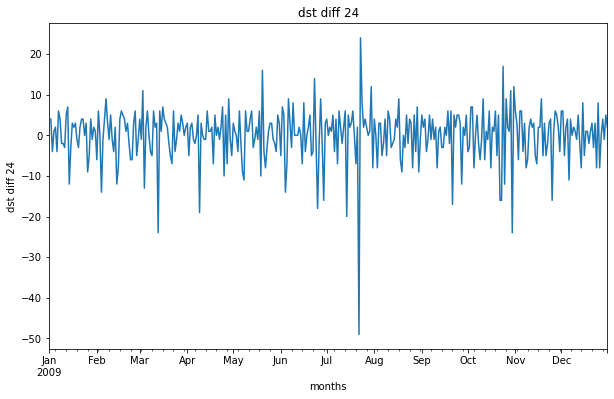

In [367]:
diff_24 = data_transposed['DST_diff_24']
plt.figure(figsize=(10, 6))
diff_24.plot(legend=False)
plt.title('dst diff 24')
plt.xlabel('months')
plt.ylabel('dst diff 24')
plt.show()

In [368]:
lag_24 = combined_data.shift(24)  # Lag 24 hours
lag_7_days = combined_data.shift(7*24)  # Lag 7 days
lag_30_days = combined_data.shift(30*24)  # Lag 30 days

In [347]:
rolling_mean = combined_data.rolling(window=24).mean()  # Rolling mean over 24 hours
rolling_std = combined_data.rolling(window=24).std()

In [348]:
combined_data = combined_data.transpose()
combined_data['day_of_week'] = combined_data.index.dayofweek
combined_data['month'] = combined_data.index.month
combined_data['season'] = combined_data.index.quarter

In [349]:
# from scipy.fft import fft

# fft_values = fft(combined_data.values)
# combined_data['fft_component_1'] = np.abs(fft_values[:, 1])  # Magnitude of the first Fourier component
# combined_data['fft_component_2'] = np.abs(fft_values[:, 2]) 

In [350]:
# combined_data['hourly_difference'] = combined_data.max(axis=1) - combined_data.min(axis=1)  # Difference between the maximum and minimum DST values within each hour
# combined_data['weekday_difference'] = combined_data[combined_data['day_of_week'] < 5].mean(axis=1) - combined_data[combined_data['day_of_week'] >= 5].mean(axis=1)  # Difference between the mean DST values on weekdays and weekends

In [351]:
moving_average = combined_data.rolling(window=7*24).mean()  # Moving average over 7 days

In [352]:
combined_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,day_of_week,month,season
2009-01-01,-7,-5,-4,-5,-7,-7,-9,-12,-11,-8,...,-17,-16,-14,-12,-7,-4,-11,3,1,1
2009-01-02,-3,-5,-6,-5,-7,-8,-9,-8,-7,-5,...,-10,-11,-9,-8,-3,-8,-7,4,1,1
2009-01-03,-10,-7,-7,-11,-14,-15,-11,-8,-7,-9,...,-14,-10,-9,-9,-8,-8,-11,5,1,1
2009-01-04,-9,-8,-8,-10,-10,-9,-6,-8,-7,-7,...,-18,-15,-11,-6,-3,-4,-10,6,1,1
2009-01-05,-5,-5,-4,-5,-6,-8,-6,-8,-11,-10,...,-12,-12,-10,-8,-9,-8,-8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,-4,-4,-4,-2,2,3,4,-1,-4,-5,...,-5,0,3,4,4,4,-2,6,12,4
2009-12-28,4,3,2,2,2,3,3,3,4,1,...,1,3,0,2,1,1,2,0,12,4
2009-12-29,0,-2,-2,-1,-1,-2,-3,-2,1,3,...,4,4,4,4,4,5,1,1,12,4
2009-12-30,5,4,3,1,2,4,5,6,6,7,...,5,8,8,11,11,11,6,2,12,4


In [353]:
combined_data['Date'] = combined_data.index
combined_data

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,day_of_week,month,season,Date
2009-01-01,-7,-5,-4,-5,-7,-7,-9,-12,-11,-8,...,-16,-14,-12,-7,-4,-11,3,1,1,2009-01-01
2009-01-02,-3,-5,-6,-5,-7,-8,-9,-8,-7,-5,...,-11,-9,-8,-3,-8,-7,4,1,1,2009-01-02
2009-01-03,-10,-7,-7,-11,-14,-15,-11,-8,-7,-9,...,-10,-9,-9,-8,-8,-11,5,1,1,2009-01-03
2009-01-04,-9,-8,-8,-10,-10,-9,-6,-8,-7,-7,...,-15,-11,-6,-3,-4,-10,6,1,1,2009-01-04
2009-01-05,-5,-5,-4,-5,-6,-8,-6,-8,-11,-10,...,-12,-10,-8,-9,-8,-8,0,1,1,2009-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,-4,-4,-4,-2,2,3,4,-1,-4,-5,...,0,3,4,4,4,-2,6,12,4,2009-12-27
2009-12-28,4,3,2,2,2,3,3,3,4,1,...,3,0,2,1,1,2,0,12,4,2009-12-28
2009-12-29,0,-2,-2,-1,-1,-2,-3,-2,1,3,...,4,4,4,4,5,1,1,12,4,2009-12-29
2009-12-30,5,4,3,1,2,4,5,6,6,7,...,8,8,11,11,11,6,2,12,4,2009-12-30


Lagged Features:
Lag 24 hours: This feature captures the DST values from the previous day at the same hour. It can be useful for capturing daily patterns or dependencies on previous day values.
Lag 7 days: This feature captures the DST values from the same day of the week, one week ago. It can be helpful for capturing weekly patterns or dependencies on previous week values.
Lag 30 days: This feature captures the DST values from the same day of the month, one month ago. It can be useful for capturing monthly patterns or dependencies on previous month values.

Rolling Statistics:
Rolling mean: This feature represents the average DST value over the previous 24 hours. It can help smooth out short-term fluctuations and highlight longer-term trends.
Rolling standard deviation: This feature represents the variability or volatility of the DST values over the previous 24 hours. It can provide insights into the stability or variability of the data.

Time-based Features:
Day of the week: This feature represents the day of the week (0 for Monday, 6 for Sunday). It can help capture weekly patterns or dependencies on specific weekdays.
Month: This feature represents the month of the year (1 for January, 12 for December). It can capture seasonal patterns or dependencies on specific months.
Season: This feature represents the quarter of the year (1-4). It can provide a higher-level view of seasonal patterns.

Fourier Transform:
Fourier components: These features represent the magnitudes of specific Fourier components of the DST values. The first and second components are commonly used to capture the dominant periodicities or frequencies in the data. Higher magnitudes indicate stronger periodic patterns.


Interactions:
Hourly difference: This feature represents the difference between the maximum and minimum DST values within each hour. It can capture the variability or range of values within each hour.
Weekday difference: This feature represents the difference between the mean DST values on weekdays and weekends. It can capture differences in DST patterns between weekdays and weekends.

Moving Averages:
Moving average: This feature represents the average DST value over the previous 7 days. It can help smooth out longer-term trends and highlight general patterns or changes over a week.

# ML models

In [354]:
from sklearn.model_selection import train_test_split

combined_data_model = combined_data.dropna()
X = combined_data_model.drop(columns=[24, 'day_of_week', 'month', 'season', 'Date'])
y = combined_data_model[24]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [355]:
from sklearn.linear_model import LinearRegression

In [356]:
# for col_name, col_values in X.iteritems():
#     for idx, value in col_values.items():
#         if value == 0.0:
#             X[col_name][idx] = 1

In [357]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [358]:
y_pred = model.predict(X_test)

In [359]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse, ' R2: ', r2)

MSE:  0.11215220253507496  R2:  0.9978611185526421


In [360]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [361]:
y_pred = model.predict(X_test)

In [362]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse, ' R2: ', r2)

MSE:  1.8310232876712331  R2:  0.9650801174550686


# CME

In [300]:
docx_file_cme = "/Users/diananigmatullina/Desktop/CME_2009.docx"

document = Document(docx_file_cme)

# Initialize variables
cme_data = ""
current_date = None

# Iterate over paragraphs in the document
for paragraph in document.paragraphs:
    text = paragraph.text.strip()
    
    # Check if the paragraph starts with a date
    if text:
        if text.endswith(':'):
            current_date = text.strip(':')
        elif current_date is not None:
            # Append the CME note to the cme_data string
            cme_data += current_date + ":\n" + text + "\n"
            cme_data += "************\n"

In [301]:
import re

# Extract the date and information before 'front'
matches = re.findall(r'(\d{2}-\w{3}-\d{4}):\n(.*?)(?=\n[0-9]{2}:[0-9]{2}\s+\w+)', cme_data, re.DOTALL)
data = [(date, info.strip()) for date, info in matches]

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['Date', 'CME Information'])

df['CME Information'] = df['CME Information'].str.extract(r'\-\s(.*)')


# # Convert 'CME Information' column to string type
# df['CME Information'] = df['CME Information'].astype(str)

# # Group the rows by date and combine the values in 'CME Information'
# grouped_df = df.groupby('Date')['CME Information'].agg(' '.join).reset_index()

# # Print the grouped DataFrame
# grouped_df.dropna()
# grouped_df
df = df[df['CME Information'] != "************"]
df.dropna()
df

,Date,CME Information
0,01-Jan-2009,NaN
2,02-Jan-2009,Jet-like front.
3,02-Jan-2009,"Faint, diffuse, and very narrow loop (jet-like..."
4,02-Jan-2009,"Faint, diffuse, and very narrow loop (jet-like..."
5,03-Jan-2009,Fan-like front.
...,...,...
388,24-Dec-2009,Begins as a helmut shaped front along C2 pylon...
389,25-Dec-2009,"Bright 2 part split LE, jet-like burst, dissip..."
390,26-Dec-2009,NaN
391,26-Dec-2009,South pole plume.


In [302]:
# Define the keywords to search for
keywords = ['jet-like', 'faint', 'diffuse', 'ragged', 'fan-like', 'slow', 'loop-like', 'spray-like', 'narrow']

# Iterate over the keywords
for keyword in keywords:
    # Create a boolean mask to identify rows containing the keyword
    mask = df['CME Information'].str.contains(keyword, case=False, na=False)
    
    # Replace the values in the 'CME Information' column with the keyword
    df.loc[mask, 'CME Information'] = keyword

# Create a boolean mask to identify rows with valid CME values
mask = df['CME Information'].isin(keywords)

# Filter the DataFrame using the mask
df_filtered = df[mask]
df_grouped = df_filtered.groupby('Date').first().reset_index()
df_grouped

,Date,CME Information
0,01-Apr-2009,faint
1,01-Mar-2009,fan-like
2,02-Apr-2009,faint
3,02-Jan-2009,jet-like
4,02-Jun-2009,jet-like
...,...,...
94,30-Aug-2009,jet-like
95,30-Mar-2009,jet-like
96,30-Nov-2009,faint
97,31-Aug-2009,ragged


In [303]:
df_grouped = df_grouped[df_grouped['Date'] != '22-Dec-1009']
df_grouped = df_grouped[df_grouped['Date'] != '10-Dec-1009']
df_grouped = df_grouped[df_grouped['Date'] != '23-Dec-1009']
df_grouped.dropna()

,Date,CME Information
0,01-Apr-2009,faint
1,01-Mar-2009,fan-like
2,02-Apr-2009,faint
3,02-Jan-2009,jet-like
4,02-Jun-2009,jet-like
...,...,...
94,30-Aug-2009,jet-like
95,30-Mar-2009,jet-like
96,30-Nov-2009,faint
97,31-Aug-2009,ragged


In [304]:
dates = []
for date_str in df_grouped['Date']:
    try:
        list_date = date_str.split('-')
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        month = months.index(list_date[1]) + 1
        day = int(list_date[0])
        year = int(list_date[2])
        dates.append(pd.Timestamp(year=year, month=month, day=day))
    except (IndexError, ValueError) as e:
        print(f"Error processing date '{date_str}': {e}")
df_grouped['Date'] = dates
df_grouped

,Date,CME Information
0,2009-04-01,faint
1,2009-03-01,fan-like
2,2009-04-02,faint
3,2009-01-02,jet-like
4,2009-06-02,jet-like
...,...,...
94,2009-08-30,jet-like
95,2009-03-30,jet-like
96,2009-11-30,faint
97,2009-08-31,ragged


In [375]:
dst_means = combined_data_model.drop(columns=['day_of_week', 'month', 'season'])
dst_means['mean_dst'] = dst_means.mean(axis = 1)
dst_means_final = pd.DataFrame()
dst_means_final['Date'] = dst_means['Date']
dst_means_final['Dst'] = dst_means['mean_dst']
dst_means_final['season'] = combined_data['season']
import scipy.stats as stats

# Assuming you have a DataFrame called 'data' with columns 'DST index' and 'season'
dst_index = dst_means_final['Dst']
season = dst_means_final['season']

# Perform ANOVA test
result = stats.f_oneway(dst_index, season)

# Extract the p-value from the result
p_value = result.pvalue

# Print the p-value
print("p-value:", p_value)

p-value: 4.902659941072155e-43


<ipython-input-375-687cebe2f248>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dst_means['mean_dst'] = dst_means.mean(axis = 1)


In [306]:
# Perform a merge on the 'date' column
merged_table = pd.merge(dst_means_final, df_grouped, on='Date', how='inner')

# Select the desired columns in the resulting merged table
final_table = merged_table[['Date', 'Dst', 'CME Information']]

# Print the final table
final_table

,Date,Dst,CME Information
0,2009-01-02,-7.12,jet-like
1,2009-01-03,-10.60,fan-like
2,2009-01-04,-9.52,faint
3,2009-01-06,-11.52,jet-like
4,2009-01-08,-1.64,diffuse
...,...,...,...
91,2009-12-06,-2.04,slow
92,2009-12-20,2.96,jet-like
93,2009-12-21,6.20,jet-like
94,2009-12-24,-2.40,ragged


In [307]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare your data
features = final_table[['Dst']]
target = final_table['CME Information']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Choose a classification algorithm
model = RandomForestClassifier()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.4
              precision    recall  f1-score   support

     diffuse       1.00      0.40      0.57         5
       faint       0.14      0.50      0.22         2
    fan-like       0.00      0.00      0.00         2
    jet-like       0.44      0.57      0.50         7
      narrow       0.00      0.00      0.00         2
      ragged       1.00      0.50      0.67         2

    accuracy                           0.40        20
   macro avg       0.43      0.33      0.33        20
weighted avg       0.52      0.40      0.41        20



/Users/diananigmatullina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the classification report, here are some conclusions that can be made:

1. Accuracy: The overall accuracy of the model is 0.4, indicating that it correctly predicts the CME category for 40% of the instances in the test set. 

2. Precision: The precision score measures the proportion of correctly predicted instances for each class. In this case, the precision is low for most classes, ranging from 0.00 to 0.44. This suggests that the model struggles to accurately predict the minority classes (e.g., fan-like, narrow, ragged), while achieving higher precision for the diffuse and jet-like classes.

3. Recall: The recall score measures the proportion of actual instances of each class that were correctly predicted. The recall is highest for the diffuse and jet-like classes, indicating that the model performs relatively better at capturing these instances compared to other classes.

4. F1-score: The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. The F1-scores are generally low for most classes, ranging from 0.00 to 0.67.

Overall, the results indicate that the model struggles to accurately classify the CME categories, especially for the minority classes. It may be beneficial to explore other classification algorithms, adjust the model parameters, or gather more data to improve the model's performance. Additionally, considering the imbalanced nature of the classes (e.g., few instances for fan-like, narrow, and ragged), addressing the class imbalance issue could potentially lead to better results.

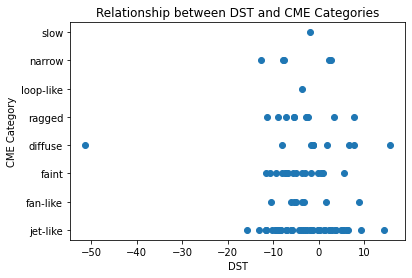

Mean DST for each CME category:
CME Information
diffuse     -3.344000
faint       -4.280000
fan-like    -2.960000
jet-like    -2.637273
loop-like   -3.720000
narrow      -4.656000
ragged      -3.536000
slow        -2.040000
Name: Dst, dtype: float64

Median DST for each CME category:
CME Information
diffuse     -1.32
faint       -4.92
fan-like    -4.32
jet-like    -2.84
loop-like   -3.72
narrow      -7.64
ragged      -4.14
slow        -2.04
Name: Dst, dtype: float64

Frequency of each CME category:
jet-like     44
faint        17
ragged       10
diffuse      10
fan-like      8
narrow        5
slow          1
loop-like     1
Name: CME Information, dtype: int64


In [308]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

final_table['Dst'] = pd.to_numeric(final_table['Dst'], errors='coerce')
final_table['CME Information'] = pd.Categorical(final_table['CME Information'])
final_table = final_table.dropna(subset=['Dst'])


# Step 1: Analyze DST and CME Data
dst_values = final_table['Dst']
cme_categories = final_table['CME Information']

# Step 2: Visualize Data
plt.scatter(dst_values, cme_categories)
plt.xlabel('DST')
plt.ylabel('CME Category')
plt.title('Relationship between DST and CME Categories')
plt.show()

# Step 3: Calculate Statistical Measures
cme_mean_dst = final_table.groupby('CME Information')['Dst'].mean()
cme_median_dst = final_table.groupby('CME Information')['Dst'].median()


# Step 5: Make Conclusions
# You can print the statistical measures and correlation coefficient
print("Mean DST for each CME category:")
print(cme_mean_dst)
print("\nMedian DST for each CME category:")
print(cme_median_dst)

# Additional Analysis:
# You can also analyze the frequency of each CME category using value_counts()
cme_counts = final_table['CME Information'].value_counts()
print("\nFrequency of each CME category:")
print(cme_counts)


Based on the results you provided, here are some conclusions that can be made:

1. Mean DST for each CME category:
   - The CME category 'slow' has the highest mean DST value of -2.04, indicating a less severe geomagnetic disturbance.
   - The CME category 'narrow' has the lowest mean DST value of -4.656, suggesting a more intense geomagnetic disturbance.

2. Median DST for each CME category:
   - The CME category 'slow' has the lowest median DST value of -2.04, indicating a less severe geomagnetic disturbance.
   - The CME category 'narrow' has the highest median DST value of -7.64, suggesting a more intense geomagnetic disturbance.

3. Frequency of each CME category:
   - The CME category 'jet-like' is the most frequent category with 44 occurrences, followed by 'faint' with 17 occurrences.
   - The least frequent categories are 'slow' and 'loop-like' with only 1 occurrence each.

These conclusions suggest that certain CME categories may be associated with specific levels of geomagnetic disturbances (as indicated by DST values) and occur with different frequencies. For example, 'narrow' CMEs tend to be associated with more intense disturbances, while 'slow' CMEs are less severe. The frequency of CME categories also varies, with 'jet-like' being the most common.

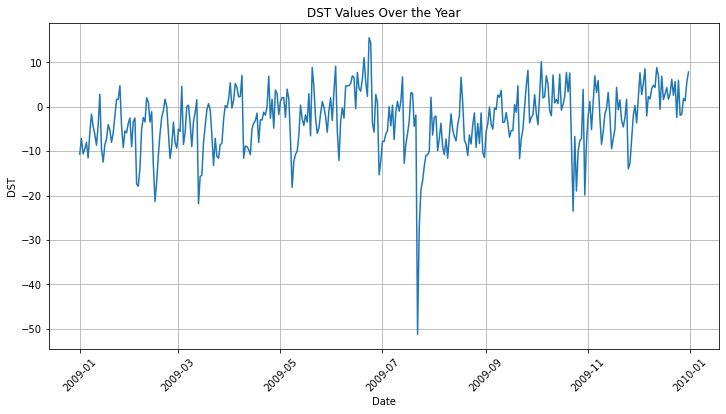

In [309]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(dst_means_final.index, dst_means_final['Dst'])
plt.title('DST Values Over the Year')
plt.xlabel('Date')
plt.ylabel('DST')
plt.grid(True)

# Customize the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 2011

In [310]:
file_paths_2011 = [
    "/Users/diananigmatullina/Desktop/dst_2011_01.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_02.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_03.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_04.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_05.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_06.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_07.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_08.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_09.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_10.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_11.docx",
    "/Users/diananigmatullina/Desktop/dst_2011_12.docx"
]

In [311]:
all_data = []  # List to store the extracted data from each file

# Iterate over the file paths
for file_path in file_paths_2011:
    # Read the data from the DOCX file
    doc = Document(file_path)

    # Initialize lists to store the extracted data
    dates = []
    values = []

    # Iterate over the paragraphs in the document
    for paragraph in doc.paragraphs:
        # Split the paragraph text based on whitespace
        parts = paragraph.text.split()

        # Extract the date and values from the split parts
        date = parts[0]
        dst_values = parts[3:]

        # Process the values and handle any errors
        try:
            dst_values = [int(value) for value in dst_values]
        except ValueError:
            dst_values = [np.nan] * len(dst_values)

        # Append the date and values to the respective lists
        dates.append(date)
        values.append(dst_values)

    # Create a pandas DataFrame from the extracted data
    dst_data = pd.DataFrame(values, index=dates)

    # Transpose the DataFrame to have dates as columns and hours as rows
    dst_data = dst_data.transpose()

    # Append the DataFrame to the list
    all_data.append(dst_data)

# Concatenate the DataFrames from all files
combined_data2 = pd.concat(all_data, axis=1)

<Figure size 3600x3600 with 0 Axes>

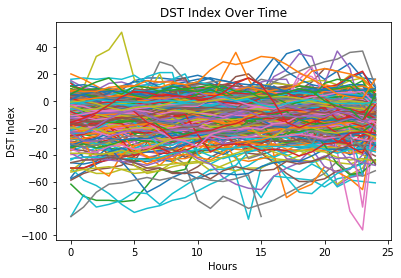

In [312]:
# Plot the DST index over time
plt.figure(figsize=(50, 50))
combined_data2.plot(legend=False)
plt.title('DST Index Over Time')
plt.xlabel('Hours')
plt.ylabel('DST Index')
plt.show()

In [313]:
# Convert the index to datetime format
dates = []
for date_str in combined_data2.columns:
    year = int(date_str[3:5]) + 2000 # Extract the year and add 2000 to convert it to a four-digit year
    month = int(date_str[5:7])       # Extract the month
    day = int(date_str[8:])         # Extract the hour
    dates.append(pd.Timestamp(year=year, month=month, day=day))


# Assign the converted dates as the new index
combined_data2.columns = dates
combined_data2.sort_index(axis=1, inplace=True)

<Figure size 720x432 with 0 Axes>

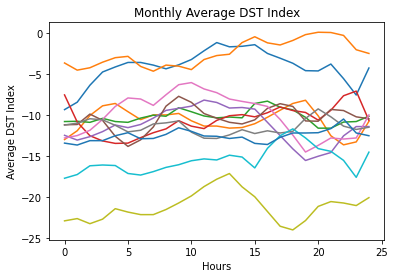

In [314]:
# Plot monthly average DST index
monthly_avg = combined_data2.resample('M', axis=1).mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(legend=False)
plt.title('Monthly Average DST Index')
plt.xlabel('Hours')
plt.ylabel('Average DST Index')
plt.show()

In [315]:
combined_data2 = combined_data2.transpose()

In [316]:
combined_data_model = combined_data2.dropna()
X = combined_data_model.drop(columns=[24])
y = combined_data_model[24]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [318]:
y_pred = model.predict(X_test)

In [319]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

0.08113040267331617 0.999384546299046


In [ ]:
combined_data2['Date'] = combined_data2.index
dst_means2 = combined_data2
dst_means2['mean_dst'] = dst_means2.mean(axis = 1)
dst_means_final2 = pd.DataFrame()
dst_means_final2['Date'] = dst_means2['Date']
dst_means_final2['Dst'] = dst_means2['mean_dst']
dst_means_final2

In [321]:
combined_df = pd.concat([combined_data, combined_data2], ignore_index=True)

In [322]:
combined_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,day_of_week,month,season,Date,mean_dst
0,-7.0,-5.0,-4.0,-5.0,-7.0,-7.0,-9.0,-12.0,-11.0,-8.0,...,-14.0,-12.0,-7.0,-4.0,-11.0,3.0,1.0,1.0,2009-01-01,NaN
1,-3.0,-5.0,-6.0,-5.0,-7.0,-8.0,-9.0,-8.0,-7.0,-5.0,...,-9.0,-8.0,-3.0,-8.0,-7.0,4.0,1.0,1.0,2009-01-02,NaN
2,-10.0,-7.0,-7.0,-11.0,-14.0,-15.0,-11.0,-8.0,-7.0,-9.0,...,-9.0,-9.0,-8.0,-8.0,-11.0,5.0,1.0,1.0,2009-01-03,NaN
3,-9.0,-8.0,-8.0,-10.0,-10.0,-9.0,-6.0,-8.0,-7.0,-7.0,...,-11.0,-6.0,-3.0,-4.0,-10.0,6.0,1.0,1.0,2009-01-04,NaN
4,-5.0,-5.0,-4.0,-5.0,-6.0,-8.0,-6.0,-8.0,-11.0,-10.0,...,-10.0,-8.0,-9.0,-8.0,-8.0,0.0,1.0,1.0,2009-01-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,5.0,7.0,7.0,7.0,5.0,4.0,7.0,10.0,12.0,...,8.0,7.0,8.0,8.0,9.0,NaN,NaN,NaN,2011-12-27,8.88
726,8.0,7.0,7.0,10.0,11.0,11.0,15.0,14.0,14.0,12.0,...,11.0,5.0,3.0,2.0,16.0,NaN,NaN,NaN,2011-12-28,15.88
727,5.0,10.0,14.0,17.0,8.0,4.0,2.0,7.0,11.0,8.0,...,0.0,-4.0,-6.0,-15.0,5.0,NaN,NaN,NaN,2011-12-29,5.44
728,-16.0,-13.0,-9.0,-3.0,3.0,7.0,6.0,4.0,4.0,3.0,...,-13.0,-7.0,-11.0,-15.0,-3.0,NaN,NaN,NaN,2011-12-30,-2.60


In [328]:
combined_data_model = combined_df.drop(columns=['day_of_week', 'month', 'season', 'Date', 'mean_dst'])
combined_data_model = combined_data_model.dropna()
X = combined_data_model.drop(columns=[24])
y = combined_data_model[24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [329]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [330]:
y_pred = model.predict(X_test)

In [331]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

0.09131616983026247 0.9990327915117497


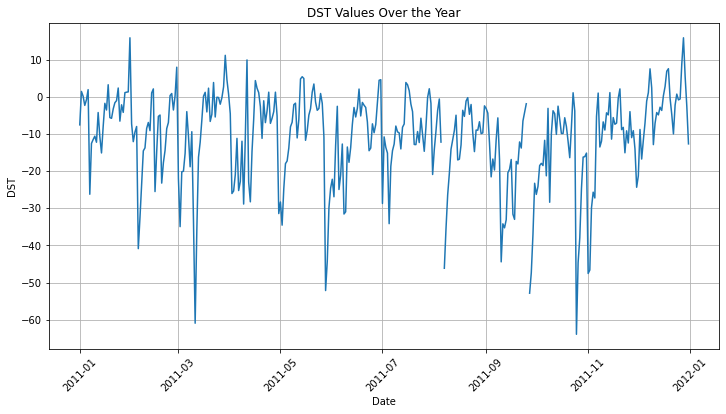

In [332]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(dst_means_final2.index, dst_means_final2['Dst'])
plt.title('DST Values Over the Year')
plt.xlabel('Date')
plt.ylabel('DST')
plt.grid(True)

# Customize the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 2022-2023

In [ ]:
import xarray as xr 
import os
import torch
import botorch 
from torch import nn 
import pandas as pd
from pyDOE import lhs
import numpy as np
from sklearn.decomposition import PCA
from scipy.interpolate import NearestNDInterpolator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader, Dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import gpytorch
from botorch.models import SingleTaskGP, FixedNoiseGP
from gpytorch.mlls.exact_marginal_log_likelihood import ExactMarginalLogLikelihood   
from botorch.acquisition.monte_carlo import qExpectedImprovement, qNoisyExpectedImprovement
from botorch.acquisition import ProbabilityOfImprovement,UpperConfidenceBound,NoisyExpectedImprovement,ExpectedImprovement,qKnowledgeGradient,PosteriorMean
from botorch.optim import optimize_acqf
from botorch.sampling import SobolQMCNormalSampler
from botorch.utils.sampling import manual_seed
from botorch.fit import fit_gpytorch_mll

In [2]:
plt.style.use('seaborn')
SMOKE_TEST = os.environ.get("SMOKE_TEST")
device = "cuda" if torch.cuda.is_available() else "cpu" 
import sklearn, scipy, matplotlib,pyDOE

torch.set_default_dtype(torch.double)

In [3]:
df = pd.read_csv('/Users/diananigmatullina/Downloads/DST.csv')

df.head()

,DSTKyoto_ML_SAT.obsTime,DSTKyoto.dst,DSTKyoto.ist,DSTKyoto.est,DSTKyoto_ML_SAT.dst,DSTKyoto_ML_SAT.ist,DSTKyoto_ML_SAT.est
0,2022-01-01 00:00:00.0,2,4.331680,9.66832,2.683340,2.554190,0.129154
1,2022-01-01 01:00:00.0,-4,1.814380,4.18562,0.813997,1.927760,-1.113770
2,2022-01-01 02:00:00.0,-8,1.032610,1.96739,-0.377509,1.570090,-1.947600
3,2022-01-01 03:00:00.0,-13,-0.347574,-1.65243,-4.511000,0.359234,-4.870230
4,2022-01-01 04:00:00.0,-20,-3.448800,-9.55120,-6.828870,-0.250455,-6.578420


In [ ]:
for i in range(0, len(df["DSTKyoto_ML_SAT.obsTime"])):
    df["DSTKyoto_ML_SAT.obsTime"][i] = df["DSTKyoto_ML_SAT.obsTime"][i][:-2]

In [41]:
df["DSTKyoto_ML_SAT.obsTime"] = df["DSTKyoto_ML_SAT.obsTime"].astype("datetime64[ns]")
df["DSTKyoto_ML_SAT.obsTime"] = df["DSTKyoto_ML_SAT.obsTime"].astype(np.int64) * 1e-9
X_d  = np.vstack([df["DSTKyoto.ist"].to_numpy().astype(np.float64), df["DSTKyoto.est"].to_numpy().astype(np.float64), df["DSTKyoto_ML_SAT.obsTime"].to_numpy().astype(np.float64) ]).T
X_d = StandardScaler().fit_transform(X_d)
y_d = df[["DSTKyoto.dst"]].to_numpy().reshape(-1,1)
y_d = StandardScaler().fit_transform(y_d)
data = np.vstack([X_d.T,y_d.T]).T
gnss = TensorDataset(torch.Tensor(X_d), torch.Tensor(y_d))

h, l = train_test_split(data, test_size=2e-6, shuffle=True)
h, test = train_test_split(h, test_size=1e-1)

In [44]:
class TestcaseDataset(Dataset):
    def __init__(self):

        self.X_h = torch.Tensor(hifi[:,:-1]) 
        self.X_l = torch.Tensor(lofi[:,:-1]) 
        self.X_test = torch.Tensor(test[:,:-1]) 
        self.Y_h = torch.Tensor(hifi[:,-1] ).unsqueeze(-1)
        self.Y_l = torch.Tensor(lofi[:,-1] ).unsqueeze(-1)
        self.Y_test = torch.Tensor(test[:,-1] ).unsqueeze(-1)

        self.h_dataset = TensorDataset(self.X_h, self.Y_h)
        self.test_dataset = TensorDataset(self.X_test, self.Y_test)

        def __call__(self):
           return self.h_dataset, self.test_dataset, self.X_h, self.X_l, self.X_test, self.Y_h, self.Y_l, self.Y_test

In [64]:
dataset = TestcaseDataset()

X_l = dataset.X_l
Y_l = dataset.Y_l
X_h = dataset.X_h
Y_h = dataset.Y_h
X_test = dataset.X_test
Y_test = dataset.Y_test
h_dataset = dataset.h_dataset
test_dataset = dataset.test_dataset


h_dataloader = DataLoader(h_dataset, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = 64, shuffle=True)

In [69]:
n_samples, n_features = X_h.shape
input_size = n_features
hidden = 128
output = 1
learning = 1e-2
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden,output):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden)
        self.relu = nn.LeakyReLU() 
        self.linear2 = nn.Linear(hidden_size, output)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [70]:
main_model = NeuralNet(input_size,hidden_size,output_size).to(device)

criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(main_model.parameters(), lr=learning) 

epochs = 3 if not SMOKE_TEST else 1 
for epoch in range(epochs):
    size = len(h_dataloader.dataset)
    main_model.train()
    for batch, (X, y) in enumerate(h_dataloader):
        X, y = X.to(device), y.to(device)


        pred = main_model(X)        
        loss = criterion(pred, y)

        optimizer.zero_grad()   
        loss.backward()         
        optimizer.step()        

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = main_model(X)
        

def pred(new_point, model):
    with torch.no_grad():
            pred_point = model(new_point)
    return pred_point

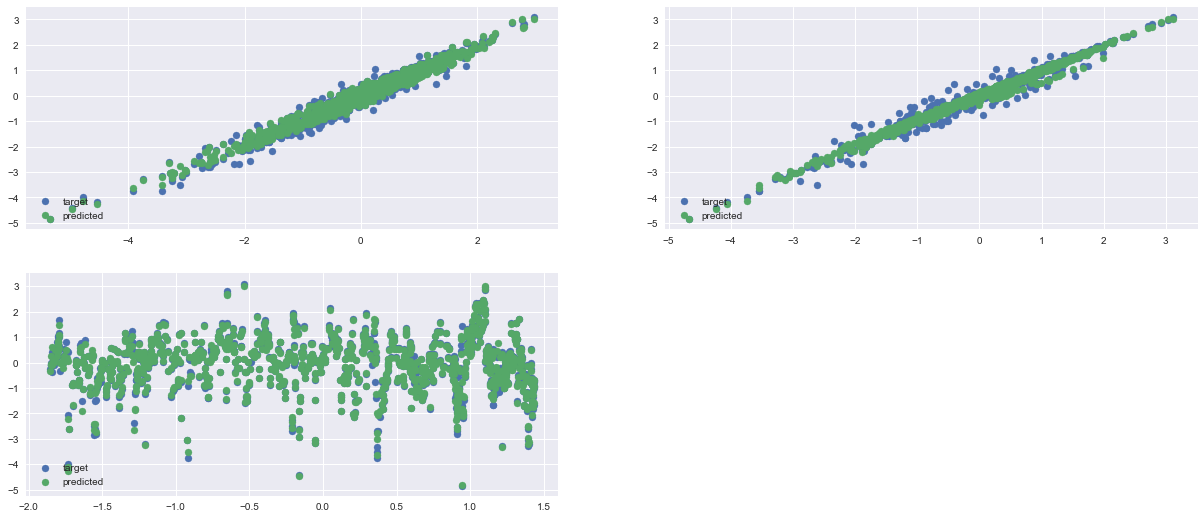

In [71]:
fig = plt.figure(figsize=(21, 9))
dim = round(X_d.shape[1]*.5)
Y_pred = pred(X_test, main_model)
for alpha in range(X_d.shape[1]):
    
    ax = fig.add_subplot(dim, dim, alpha+1)
    ax.scatter(X_test[:,alpha].numpy(), Y_test.numpy(),label = 'target')
    ax.scatter(X_test[:,alpha].numpy(), Y_pred.numpy(),label = 'predicted')
    plt.legend(loc="lower left")
plt.show()